In [1]:
from qiskit_qec.circuits import ArcCircuit
from qiskit_qec.decoders import UnionFindDecoder
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeSherbrooke
import numpy as np

from qiskit_qec.analysis._c_analysis import _CErrorPropagator             failed, raising No module named 'qiskit_qec.analysis._c_analysis'
Traceback (most recent call last):
  File "/Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/libs/qiskit-qec/src/qiskit_qec/analysis/extensions.py", line 21, in <module>
    from qiskit_qec.analysis._c_analysis import _CErrorPropagator  # pylint: disable=unused-import
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'qiskit_qec.analysis._c_analysis'
from qiskit_qec.analysis._c_analysis import _CFaultEnumerator             failed, raising No module named 'qiskit_qec.analysis._c_analysis'
Traceback (most recent call last):
  File "/Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/libs/qiskit-qec/src/qiskit_qec/analysis/extensions.py", line 32, in <module>
    from qiskit_qec.analysis._c_analysis import _CFaultEnumerator  # pylint: d

We'll consider a repetition code on the following line of qubits (ancillas in brackets). In this example, we'll consider an encoded logical `1`.

```
    0--(1)--2--(3)--4--(5)--6--(7)--8
```

In [2]:
links = [[0, 1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 8]]
T = 5 # number of syndrome measurement rounds
code = ArcCircuit(links, T, basis='zz',logical='1')

Let's look at the circuit.

In [3]:
qc = code.circuit['zz']
qc.draw(fold=-1)

░ ┌───┐          ┌───┐                     ░ ┌─┐                     ░ ┌───┐          ┌───┐                     ░ ┌─┐                     ░ ┌───┐          ┌───┐                     ░ ┌─┐                     ░ ┌───┐          ┌───┐                     ░ ┌─┐                     ░ ┌───┐          ┌───┐                     ░ ┌─┐                        
      link_qubit_0: ──────░─┤ X ├──────────┤ X ├─────────────────────░─┤M├─|0>─────────────────░─┤ X ├──────────┤ X ├─────────────────────░─┤M├─|0>─────────────────░─┤ X ├──────────┤ X ├─────────────────────░─┤M├─|0>─────────────────░─┤ X ├──────────┤ X ├─────────────────────░─┤M├─|0>─────────────────░─┤ X ├──────────┤ X ├─────────────────────░─┤M├────────────────────────
                          ░ └─┬─┘          └─┬─┘          ┌───┐┌───┐ ░ └╥┘ ┌─┐                 ░ └─┬─┘          └─┬─┘          ┌───┐┌───┐ ░ └╥┘ ┌─┐                 ░ └─┬─┘          └─┬─┘          ┌───┐┌───┐ ░ └╥┘ ┌─┐                 ░ └─┬─┘          └─┬─┘          ┌───┐┌───┐ ░ └╥┘ ┌─┐                 ░ └─┬─┘          └─┬─┘          ┌───┐┌───┐ ░ └╥┘┌─┐                     
      link_qubit_1: ──────░───┼──────────────┼────────────┤ X ├┤ X ├─░──╫──┤M├──|0>────────────░───┼──────────────┼────────────┤ X ├┤ X ├─░──╫──┤M├──|0>────────────░───┼──────────────┼────────────┤ X ├┤ X ├─░──╫──┤M├──|0>────────────░───┼──────────────┼────────────┤ X ├┤ X ├─░──╫──┤M├──|0>────────────░───┼──────────────┼────────────┤ X ├┤ X ├─░──╫─┤M├─────────────────────
                          ░   │  ┌───┐       │  ┌───┐     └─┬─┘└─┬─┘ ░  ║  └╥┘  ┌─┐            ░   │  ┌───┐       │  ┌───┐     └─┬─┘└─┬─┘ ░  ║  └╥┘  ┌─┐            ░   │  ┌───┐       │  ┌───┐     └─┬─┘└─┬─┘ ░  ║  └╥┘  ┌─┐            ░   │  ┌───┐       │  ┌───┐     └─┬─┘└─┬─┘ ░  ║  └╥┘  ┌─┐            ░   │  ┌───┐       │  ┌───┐     └─┬─┘└─┬─┘ ░  ║ └╥┘┌─┐                  
      link_qubit_2: ──────░───┼──┤ X ├───────┼──┤ X ├───────┼────┼───░──╫───╫───┤M├──|0>───────░───┼──┤ X ├───────┼──┤ X ├───────┼────┼───░──╫───╫───┤M├──|0>───────░───┼──┤ X ├───────┼──┤ X ├───────┼────┼───░──╫───╫───┤M├──|0>───────░───┼──┤ X ├───────┼──┤ X ├───────┼────┼───░──╫───╫───┤M├──|0>───────░───┼──┤ X ├───────┼──┤ X ├───────┼────┼───░──╫──╫─┤M├──────────────────
                          ░   │  └─┬─┘┌───┐  │  └─┬─┘┌───┐  │    │   ░  ║   ║   └╥┘  ┌─┐       ░   │  └─┬─┘┌───┐  │  └─┬─┘┌───┐  │    │   ░  ║   ║   └╥┘  ┌─┐       ░   │  └─┬─┘┌───┐  │  └─┬─┘┌───┐  │    │   ░  ║   ║   └╥┘  ┌─┐       ░   │  └─┬─┘┌───┐  │  └─┬─┘┌───┐  │    │   ░  ║   ║   └╥┘  ┌─┐       ░   │  └─┬─┘┌───┐  │  └─┬─┘┌───┐  │    │   ░  ║  ║ └╥┘┌─┐               
      link_qubit_3: ──────░───┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼───░──╫───╫────╫───┤M├──|0>──░───┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼───░──╫───╫────╫───┤M├──|0>──░───┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼───░──╫───╫────╫───┤M├──|0>──░───┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼───░──╫───╫────╫───┤M├──|0>──░───┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼───░──╫──╫──╫─┤M├───────────────
                    ┌───┐ ░   │    │  └─┬─┘  │    │  └─┬─┘  │    │   ░  ║   ║    ║   └╥┘       ░   │    │  └─┬─┘  │    │  └─┬─┘  │    │   ░  ║   ║    ║   └╥┘       ░   │    │  └─┬─┘  │    │  └─┬─┘  │    │   ░  ║   ║    ║   └╥┘       ░   │    │  └─┬─┘  │    │  └─┬─┘  │    │   ░  ║   ║    ║   └╥┘       ░   │    │  └─┬─┘  │    │  └─┬─┘  │    │   ░  ║  ║  ║ └╥┘┌─┐            
      code_qubit_0: ┤ X ├─░───■────┼────┼────┼────┼────┼────┼────┼───░──╫───╫────╫────╫────────░───■────┼────┼────┼────┼────┼────┼────┼───░──╫───╫────╫────╫────────░───■────┼────┼────┼────┼────┼────┼────┼───░──╫───╫────╫────╫────────░───■────┼────┼────┼────┼────┼────┼────┼───░──╫───╫────╫────╫────────░───■────┼────┼────┼────┼────┼────┼────┼───░──╫──╫──╫──╫─┤M├────────────
                    ├───┤ ░        │    │    │    │    │    │    │   ░  ║   ║    ║    ║        ░        │    │    │    │    │    │    │   ░  ║   ║    ║    ║        ░        │    │    │    │    │    │    │   ░  ║   ║    ║    ║        ░        │    │    │    │    │    │    │   

By running a noiseless simulation, we can see what a noiseless result looks like.

In [4]:
counts = AerSimulator().run(qc).result().get_counts()
print(type(str(counts)))
print(str(counts))
print(type(counts))

<class 'str'>
{'11111 0000 0000 0000 0000 0000': 1024}
<class 'qiskit.result.counts.Counts'>


We'll set up a Union Find decoder to use with this code.

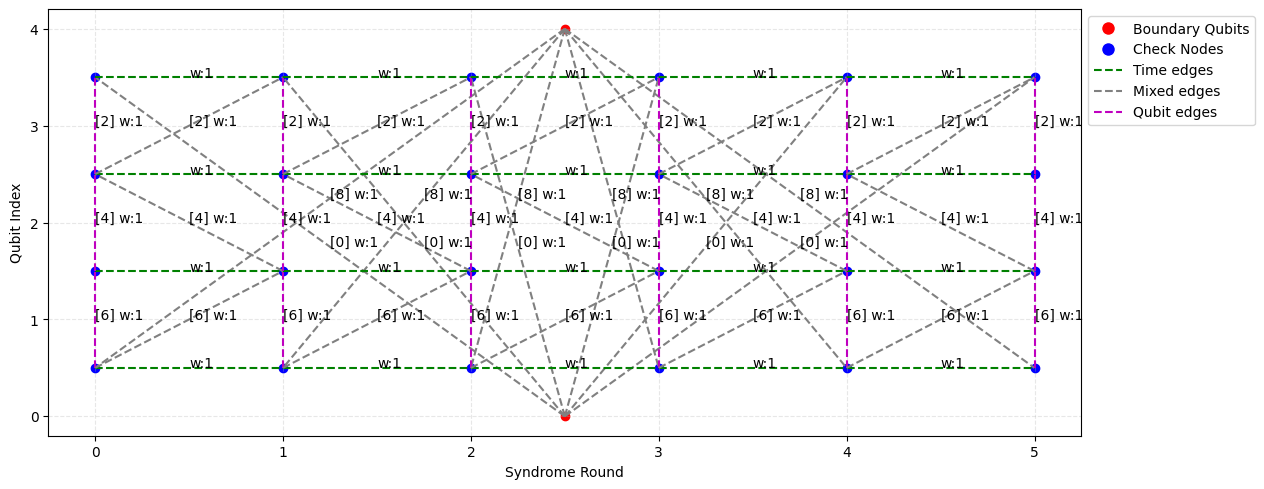

In [6]:
decoder = UnionFindDecoder(ArcCircuit(links, T))

from soft_info import rx_draw_2D
rx_draw_2D(decoder.decoding_graph.graph)

In [18]:
decoder.decoding_graph.graph.nodes()

[{'is_boundary': True, 'time': None, 'qubits': [0], 'index': 0, 'properties': {'conjugate': False, 'link qubit': None}},
 {'is_boundary': True, 'time': None, 'qubits': [8], 'index': 1, 'properties': {'conjugate': False, 'link qubit': None}},
 {'is_boundary': False, 'time': 0, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 1, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 2, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 3, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 4, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 5, 'qubits': [6, 8], 'index': 0, 'properties': {'conjugate': False, 'link qubit': 7}},
 {'is_boundary': False, 'time': 0, 'qubits':

In [1]:
logical = decoder.process(str(counts))
print(type(logical))
print(logical)

NameError: name 'decoder' is not defined

The result here tells use that the result of the logical measurement is `1`, as required.

Now let's get noisy results. For example: from a fake backend.

In [54]:
counts = FakeSherbrooke().run(qc, shots=10000).result().get_counts()

In [55]:
print(counts.items())


dict_items([('11111 0010 1000 0100 0000 0000', 1), ('11111 1000 0000 0000 0001 0000', 1), ('01101 0000 0000 0000 0000 0000', 1), ('10111 0000 0001 0000 0000 0000', 1), ('01111 1000 1000 1000 1000 1000', 1), ('11011 0001 0000 0010 0001 0000', 1), ('11111 0001 0000 1000 0000 0000', 1), ('11111 0000 1000 0000 0000 0100', 1), ('11110 1000 0000 0000 0000 0100', 1), ('11101 0100 0000 0000 0001 0000', 1), ('11111 0010 0000 0000 0100 0000', 1), ('11111 0000 0010 1000 0000 0000', 2), ('11011 0000 0001 0000 0001 0000', 1), ('10011 0000 0000 1000 0100 0000', 1), ('11111 0000 0001 1000 0001 0000', 1), ('11011 0000 0001 0000 0000 1000', 1), ('11111 0000 0100 0000 0001 0010', 1), ('11011 0000 0001 0000 0000 0100', 1), ('11111 0000 0001 0001 0010 0000', 1), ('11011 0100 1000 0000 0001 0000', 1), ('11111 0000 0000 1000 0000 0010', 2), ('11011 1100 0100 0000 0000 0000', 1), ('11111 0100 0000 0000 0000 1000', 2), ('01111 0000 1000 0000 0000 0000', 1), ('10111 0001 0000 0100 0000 0000', 1), ('11111 0000 

We can run this through the decoder to see how many times we get logical 0 and logical 1.

In [58]:
logical_counts = {0:0, 1:0}
for string, shots in counts.items():
    logical_counts[decoder.process(string)[0]] += shots
print(logical_counts)

{0: 4, 1: 9996}


The numbers will change with shot noise, but the correct outcome (logical 1) certainly seems to come out on top!

Now let's run on a real device. For this we need to import more things.

# Let's manage my IBM account
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account on disk.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="smthg")

In [65]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile

provider = IBMProvider()

We'll consider a smaller code

```
    0--(1)--2--(3)--4
```

In [66]:
links = [[0, 1, 2], [2, 3, 4]]
T = 5 # number of syndrome measurement rounds
code = ArcCircuit(links, T, basis='zz',logical='1')

qc = code.circuit['zz']

We'll run it on the 7 qubit `'ibm_nairobi'`, whose coupling map is

```
    0--1--2
       |
       3
       |
    4--5--6
```

In [67]:
backend = provider.get_backend('ibm_nairobi')

We'll use qubits 0, 1, 3, 5 and 6 of the device as the qubits in our circuit. We can do this by looking at the list of qubits in our circuit

In [68]:
qc.qubits


[Qubit(QuantumRegister(2, 'link_qubit'), 0),
 Qubit(QuantumRegister(2, 'link_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 0),
 Qubit(QuantumRegister(3, 'code_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 2)]

# We have 2 registers, link_qubit and code_qubit, for the ancillas and the qubits. 

Qubit(QuantumRegister(2, 'link_qubit'), 0): This represents the qubit at index 0 in a quantum register named 'link_qubit', which has a total of 2 qubits.

Qubit(QuantumRegister(2, 'link_qubit'), 1): This represents the qubit at index 1 in the same 'link_qubit' register.

Qubit(QuantumRegister(3, 'code_qubit'), 0): This represents the qubit at index 0 in a quantum register named 'code_qubit', which has a total of 3 qubits.

Qubit(QuantumRegister(3, 'code_qubit'), 1): This represents the qubit at index 1 in the 'code_qubit' register.

Qubit(QuantumRegister(3, 'code_qubit'), 2): This represents the qubit at index 2 in the 'code_qubit' register.

Then we write a corresponding list of the qubits on the device that we want to to those jobs

In [69]:
initial_layout = [1, 5, 0, 3, 6] # for link_qubit and code_qubit [link_qubit, code_qubit]

Then we transpile the circuit for the device.

In [73]:
transpiled_qc = transpile(qc, backend, initial_layout=initial_layout) #* virtual to physical: [0, 3, 5]  
transpiled_qc.draw(fold=-1)


┌───┐ ░                      ░               ░                      ░               ░                      ░               ░                      ░               ░                      ░       ┌─┐      
  code_qubit_0 -> 0 ┤ X ├─░───■──────────────────░───────────────░───■──────────────────░───────────────░───■──────────────────░───────────────░───■──────────────────░───────────────░───■──────────────────░───────┤M├──────
                    └───┘ ░ ┌─┴─┐┌───┐           ░ ┌─┐           ░ ┌─┴─┐┌───┐           ░ ┌─┐           ░ ┌─┴─┐┌───┐           ░ ┌─┐           ░ ┌─┴─┐┌───┐           ░ ┌─┐           ░ ┌─┴─┐┌───┐           ░ ┌─┐   └╥┘      
  link_qubit_0 -> 1 ──────░─┤ X ├┤ X ├───────────░─┤M├─|0>───────░─┤ X ├┤ X ├───────────░─┤M├─|0>───────░─┤ X ├┤ X ├───────────░─┤M├─|0>───────░─┤ X ├┤ X ├───────────░─┤M├─|0>───────░─┤ X ├┤ X ├───────────░─┤M├────╫───────
                          ░ └───┘└─┬─┘           ░ └╥┘           ░ └───┘└─┬─┘           ░ └╥┘           ░ └───┘└─┬─┘           ░ └╥┘           ░ └───┘└─┬─┘           ░ └╥┘           ░ └───┘└─┬─┘           ░ └╥┘    ║       
     ancilla_0 -> 2 ───────────────┼────────────────╫─────────────────────┼────────────────╫─────────────────────┼────────────────╫─────────────────────┼────────────────╫─────────────────────┼────────────────╫─────╫───────
                    ┌───┐ ░        │             ░  ║            ░        │             ░  ║            ░        │             ░  ║            ░        │             ░  ║            ░        │             ░  ║     ║ ┌─┐   
  code_qubit_1 -> 3 ┤ X ├─░────────■────■────────░──╫────────────░────────■────■────────░──╫────────────░────────■────■────────░──╫────────────░────────■────■────────░──╫────────────░────────■────■────────░──╫─────╫─┤M├───
                    └───┘ ░             │        ░  ║            ░             │        ░  ║            ░             │        ░  ║            ░             │        ░  ║            ░             │        ░  ║     ║ └╥┘   
     ancilla_1 -> 4 ────────────────────┼───────────╫──────────────────────────┼───────────╫──────────────────────────┼───────────╫──────────────────────────┼───────────╫──────────────────────────┼───────────╫─────╫──╫────
                          ░           ┌─┴─┐┌───┐ ░  ║  ┌─┐       ░           ┌─┴─┐┌───┐ ░  ║  ┌─┐       ░           ┌─┴─┐┌───┐ ░  ║  ┌─┐       ░           ┌─┴─┐┌───┐ ░  ║  ┌─┐       ░           ┌─┴─┐┌───┐ ░  ║ ┌─┐ ║  ║    
  link_qubit_1 -> 5 ──────░───────────┤ X ├┤ X ├─░──╫──┤M├──|0>──░───────────┤ X ├┤ X ├─░──╫──┤M├──|0>──░───────────┤ X ├┤ X ├─░──╫──┤M├──|0>──░───────────┤ X ├┤ X ├─░──╫──┤M├──|0>──░───────────┤ X ├┤ X ├─░──╫─┤M├─╫──╫────
                    ┌───┐ ░           └───┘└─┬─┘ ░  ║  └╥┘       ░           └───┘└─┬─┘ ░  ║  └╥┘       ░           └───┘└─┬─┘ ░  ║  └╥┘       ░           └───┘└─┬─┘ ░  ║  └╥┘       ░           └───┘└─┬─┘ ░  ║ └╥┘ ║  ║ ┌─┐
  code_qubit_2 -> 6 ┤ X ├─░──────────────────■───░──╫───╫────────░──────────────────■───░──╫───╫────────░──────────────────■───░──╫───╫────────░──────────────────■───░──╫───╫────────░──────────────────■───░──╫──╫──╫──╫─┤M├
                    └───┘ ░                      ░  ║   ║        ░                      ░  ║   ║        ░                      ░  ║   ║        ░                      ░  ║   ║        ░                      ░  ║  ║  ║  ║ └╥┘
round_0_link_bit: 2/════════════════════════════════╩═══╩══════════════════════════════════╬═══╬══════════════════════════════════╬═══╬══════════════════════════════════╬═══╬══════════════════════════════════╬══╬══╬══╬══╬═
                                                    0   1                                  ║   ║                                  ║   ║                                  ║   ║                                  ║  ║  ║  ║  ║ 
round_1_link_bit: 2/═══════════════════════════════════════════════════════════════════════╩═══╩══════════════════════════════════╬═══╬══════════════════════════════════╬═══╬══════════════════════════════════╬══╬══╬══╬══╬═
      

Now we can run it, using `meas_level=1` and `, meas_return='single'` to get IQ data.

In [74]:
job_id = backend.run(transpiled_qc, shots=10, meas_level=1, meas_return='single').job_id()  # meas_level 1: IQ (0 is counts), meas_return: single for info from every shot (not 'avg')
job_id


'cmddq0c4z12g008ncbag'

You can check to see if it has run.

In [75]:
job = provider.retrieve_job(job_id)
job.status()

<JobStatus.QUEUED: 'job is queued'>

Once it has you can get the data.

In [93]:
memory = job.result().get_memory()


array([[-6.05718180e+07-1.16230279e+08j, -1.77357110e+07-2.05613950e+07j,
        -7.54016280e+07-8.66710940e+07j, -2.72688500e+07-1.45917150e+07j,
        -5.93042320e+07-7.31956350e+07j, -3.84777870e+07-2.91203370e+07j,
        -4.95595730e+07-8.12845510e+07j,  1.78829140e+07-3.77327630e+07j,
         9.21511710e+07-8.76028740e+07j,  2.68545160e+07-4.48849800e+07j,
        -5.80192610e+07-1.70220713e+08j,  5.21679180e+07-6.49795510e+07j,
        -6.44992340e+07-2.65602060e+07j],
       [-5.56441360e+07-7.63864330e+07j, -3.33312460e+07-3.15287650e+07j,
        -7.09925420e+07-8.30708780e+07j, -2.62996270e+07-3.46741530e+07j,
        -4.23145860e+07-9.54453680e+07j, -1.12170380e+07-2.97557700e+07j,
        -9.06116440e+07-6.81459010e+07j, -2.64236800e+07-1.61335910e+07j,
        -7.76912560e+07-7.18648140e+07j, -2.06060100e+07-1.74199610e+07j,
         1.00162246e+08-1.09668839e+08j,  5.84972550e+07-5.57579320e+07j,
         3.32622620e+07-3.84332420e+07j],
       [-3.94559300e+07-5.19

In [94]:
# Results 02.10.2023
memory_backup = np.array([[-6.05718180e+07-1.16230279e+08j, -1.77357110e+07-2.05613950e+07j,
        -7.54016280e+07-8.66710940e+07j, -2.72688500e+07-1.45917150e+07j,
        -5.93042320e+07-7.31956350e+07j, -3.84777870e+07-2.91203370e+07j,
        -4.95595730e+07-8.12845510e+07j,  1.78829140e+07-3.77327630e+07j,
         9.21511710e+07-8.76028740e+07j,  2.68545160e+07-4.48849800e+07j,
        -5.80192610e+07-1.70220713e+08j,  5.21679180e+07-6.49795510e+07j,
        -6.44992340e+07-2.65602060e+07j],
       [-5.56441360e+07-7.63864330e+07j, -3.33312460e+07-3.15287650e+07j,
        -7.09925420e+07-8.30708780e+07j, -2.62996270e+07-3.46741530e+07j,
        -4.23145860e+07-9.54453680e+07j, -1.12170380e+07-2.97557700e+07j,
        -9.06116440e+07-6.81459010e+07j, -2.64236800e+07-1.61335910e+07j,
        -7.76912560e+07-7.18648140e+07j, -2.06060100e+07-1.74199610e+07j,
         1.00162246e+08-1.09668839e+08j,  5.84972550e+07-5.57579320e+07j,
         3.32622620e+07-3.84332420e+07j],
       [-3.94559300e+07-5.19440240e+07j,  3.98886540e+07-8.80950700e+06j,
        -6.74824640e+07-6.49450650e+07j, -2.23079520e+07-2.81641520e+07j,
        -6.07614130e+07-7.41911440e+07j,  1.85453930e+07-3.11915360e+07j,
        -9.38214960e+07-6.88664880e+07j, -9.42476000e+05-2.45899590e+07j,
        -4.71577750e+07-7.99126080e+07j,  3.66830820e+07-5.08866120e+07j,
         8.13916370e+07-7.75144840e+07j,  4.27108330e+07-8.56394780e+07j,
        -6.04047840e+07-6.67993550e+07j],
       [-4.05947850e+07-1.08850865e+08j, -3.06246980e+07-3.72498750e+07j,
        -6.34267780e+07-5.78849130e+07j, -3.00719120e+07-2.81016900e+07j,
        -7.29234210e+07-7.31104220e+07j, -3.07599680e+07-2.05139670e+07j,
        -5.44386150e+07-6.60328690e+07j, -1.85539530e+07-2.02077730e+07j,
        -8.64120190e+07-7.48609080e+07j, -3.47129890e+07-2.81709700e+07j,
         7.61105000e+07-9.04371020e+07j,  2.42247120e+07-6.55890570e+07j,
         4.93303900e+07-6.36440310e+07j],
       [-8.07673940e+07-7.92238040e+07j,  2.43605530e+07-1.69968550e+07j,
        -3.26330930e+07-9.98393430e+07j,  2.41946890e+07-8.08975200e+06j,
         6.12173840e+07-1.13490837e+08j,  1.59627040e+07-1.88710890e+07j,
         5.20236410e+07-7.33739150e+07j, -1.48281300e+06-7.28967100e+06j,
         4.22637780e+07-9.44036700e+07j,  3.25918230e+07-1.71133070e+07j,
         6.39383510e+07-7.49496030e+07j, -1.87808440e+07-6.59122990e+07j,
         3.19202980e+07-5.23761380e+07j],
       [-2.17958690e+07-6.85913950e+07j, -1.63054790e+07-2.66985220e+07j,
        -6.72797000e+07-8.72453130e+07j, -1.83681370e+07-1.41793650e+07j,
        -8.55207440e+07-1.00927343e+08j, -4.51635150e+07-1.78606730e+07j,
        -3.88994140e+07-9.67812270e+07j, -4.06951810e+07-2.38480320e+07j,
        -7.32612350e+07-9.69143930e+07j, -1.37666210e+07-3.30324930e+07j,
         5.10454810e+07-4.89773210e+07j, -3.93722890e+07-4.94268420e+07j,
         5.65870530e+07-4.19752660e+07j],
       [-3.88270660e+07-9.89729900e+07j, -2.85989590e+07-2.74028890e+07j,
         5.85673160e+07-7.24760900e+07j, -2.31269460e+07-5.02297400e+06j,
         4.41322290e+07-8.23266610e+07j, -2.56257940e+07-7.04867400e+06j,
         1.98711060e+07-6.32808100e+07j, -2.51368110e+07-2.62170280e+07j,
         6.86726950e+07-8.95571240e+07j, -4.14017480e+07-1.97041760e+07j,
        -4.70579320e+07-8.71390050e+07j,  2.56557180e+07-3.73138400e+07j,
         5.47383700e+07-5.56334520e+07j],
       [-4.17141210e+07-6.32660240e+07j, -1.57252080e+07-3.25786980e+07j,
        -6.58795400e+07-7.06338880e+07j, -1.58922290e+07-2.43201990e+07j,
        -7.17699550e+07-9.90678900e+07j, -3.57389770e+07-3.23995840e+07j,
        -5.71915490e+07-9.29176490e+07j, -2.55354760e+07-1.91200660e+07j,
        -9.14246940e+07-7.50560570e+07j,  2.88276210e+07-1.97786100e+07j,
         1.02998146e+08-8.53067810e+07j,  2.06140110e+07-7.39512330e+07j,
        -6.20332350e+07-4.80709060e+07j],
       [-6.65464190e+07-8.21167010e+07j, -4.21616810e+07-3.68474220e+07j,
        -5.67168300e+07-6.73078020e+07j, -2.48827360e+07-1.50992210e+07j,
        -7.82871720e+07-8.57222990e+07j,  8.20270000e+05-2.54590170e+07j,
         7.40226630e+07-6.63071370e+07j,  6.04049100e+06-2.75098000e+06j,
         5.35127390e+07-6.70258240e+07j, -2.11464530e+07-2.98407530e+07j,
        -5.25771110e+07-1.06363324e+08j,  4.18134060e+07-5.43556470e+07j,
         2.58797610e+07-4.83128110e+07j],
       [-8.54888170e+07-6.94140960e+07j, -1.90457980e+07-3.43862880e+07j,
        -8.81466820e+07-6.21222780e+07j, -4.30193170e+07-3.38608050e+07j,
         7.22021240e+07-6.21046220e+07j, -2.16776780e+07-8.12576400e+06j,
         5.70201110e+07-4.89094890e+07j, -1.76248300e+06-1.89023310e+07j,
         3.54888520e+07-1.09622409e+08j, -1.83890990e+07-6.80994000e+06j,
        -9.97919470e+07-1.17841121e+08j,  5.91418400e+07-6.72710740e+07j,
         7.30647170e+07-6.11218380e+07j]])

Here's the data I got, as an example.

In [3]:
memory = [[(19420257-31296402j), (78090974-98300161j), (-26993994-67843761j), (32656587-32240008j), (-47632347-42956147j), (-64270512-77078399j), (22570956-56336092j), (70750837-70883050j), (17086269-41795778j), (-86652107-94728909j), (-57580337-54559100j), (60946493-56827137j), (39701603-49235333j)], [(45448822-22891704j), (28972987-76642662j), (35696101-41251677j), (-27293308-82591724j), (28646193-4351385j), (20262710-90918974j), (34703717-1348125j), (39217767-64066749j), (32185379-27901882j), (-14660310-116031631j), (50428977-63757556j), (-72530828-31914511j), (-61009440-27341723j)], [(30765847-5020032j), (-80203959-70919051j), (33138034-16632060j), (-16888719-54107225j), (31595026-58034010j), (-56404518-29778216j), (33259764-51242029j), (-32631150-42994405j), (18463991-47959003j), (-63889749-86085072j), (-42264015-34250350j), (69934428-40876033j), (57182330-51987117j)], [(-22337681-52881511j), (-42001056-94660156j), (13662269-55479097j), (71515224-115865276j), (-29426295-43152450j), (27247941-87621392j), (18109864-36276339j), (-115218213-136162896j), (21432085-46647113j), (-99717374-83634433j), (40583756-51531200j), (-94634887-37295630j), (2956635-15559150j)], [(-49547955-67052879j), (-50178306-48885754j), (68188263-44408209j), (-49666006-46116314j), (-31716133-61749381j), (72098487-89451384j), (-35663292-48626391j), (25955082-120894542j), (-33740689-29125660j), (-48942615-52675993j), (-38153140-64728499j), (-79311918-96291977j), (-58504710-33118520j)], [(-13299752-74536026j), (-22583714-112633524j), (-56152251-69582854j), (-12694332-112975466j), (-21992216-3458160j), (-2769775-81429912j), (-10440000-52882456j), (81111511-55125323j), (-41724292-41336603j), (-37748884-94361776j), (38085762-53603468j), (69674980-57210413j), (-50028930-45639554j)], [(-25146582-57766128j), (-40050118-47206266j), (-12733669-37904986j), (-80713399-124141798j), (16630123-38666401j), (-35122656-78717542j), (47945910-27889232j), (-6832846-70810976j), (33262009-43329793j), (-54007773-88947320j), (-63686738-70530012j), (70057498-74794030j), (34815282-58852981j)], [(-40545174-35894125j), (37810716-70251263j), (42292921-42841406j), (83599630-89354707j), (23397806-66337020j), (-78425271-82588221j), (-48302116-70089491j), (20558533-69648545j), (-27188388-68313799j), (112824781-105239253j), (-31611961-70921977j), (-75112529-13943361j), (4931739-71795460j)], [(-48736332-49356072j), (-25972498-85548731j), (21760775-47445845j), (58094076-63323301j), (11086393-28068941j), (53003787-2064484j), (38753127-73961417j), (65867149-71616072j), (29025834-53669549j), (28405551-67029247j), (71256754-52493870j), (-86116708-68024396j), (44246220-31298039j)], [(-33358668-41931424j), (-35380682-27836306j), (-38656776-54597609j), (-26607730-81412540j), (-38272488-56504716j), (-23629785-53921264j), (24542927-52277441j), (-56533052-37534841j), (39894419-62623331j), (-73023073-93757781j), (-33673107-29574587j), (84835551-86841384j), (33968836-45701478j)]]

#print the shape of memory
print(np.shape(memory)) # the shape is (shots, link qubits * T + code qubits ) => each qubit gets read out because final measurement of code qubits

(10, 13)


Now all that's left is to find the points corresponding to a given sample `s` (out of the `shots` samples taken) and the qubit `q` (as numbered in `links`). For the ancilla qubits, you also need to specificy which measurement round, `t`. The following function is what I use to do this.

In [10]:
def get_point(memory, code, s, q, t=0):
    if q in code.code_index: # if q is a key in code_index
        k = - code.num_qubits[0] + code.code_index[q] # The code register is at the end
    elif q in code.link_index: # if q is a key in link_index
        k = t*code.num_qubits[1] + code.link_index[q] # mod t to get the right round 
    x = memory[s][k].real # take the s-th shot and the k-th qubit outcome
    y = memory[s][k].imag 
    return x,y

In [11]:
print(code.num_qubits) # gives the number of qubits per register
print(code.code_index) # gives the index of the code qubits and their numbering in the code register
print(code.link_index) # gives the index of the link qubit and their numbering in the link register
print(code.num_qubits[0]) # gives the number of code qubits
print(code.num_qubits[1]) # gives the number of link qubits

[5, 4]
{0: 0, 2: 1, 4: 2, 6: 3, 8: 4}
{1: 0, 3: 1, 5: 2, 7: 3}
5
4


In [12]:
print(memory[0][-3])

print(memory[0])

(-57580337-54559100j)
[(19420257-31296402j), (78090974-98300161j), (-26993994-67843761j), (32656587-32240008j), (-47632347-42956147j), (-64270512-77078399j), (22570956-56336092j), (70750837-70883050j), (17086269-41795778j), (-86652107-94728909j), (-57580337-54559100j), (60946493-56827137j), (39701603-49235333j)]
